In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# df_b_make_csv = pd.read_json('core/goodreads_reviews_raw.json', lines=True)
# df_b_make_csv.to_csv('core/goodreads_reviews_complete.csv')
# df_b = df_books.sample(frac=0.5, random_state=42)
# df_b.to_csv('core/goodreads_reviews_halved.csv')

df_b = pd.read_csv('core/goodreads_reviews_complete.csv')
# df_b = pd.read_csv('core/goodreads_reviews_halved.csv')
df_b.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
# folder_path = 'core/dataset/'
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# dfs = []
# for file in csv_files:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)
#     df['movie_title'] = file.split('.csv')[0]
#     dfs.append(df)
# df_m = pd.concat(dfs, ignore_index=True)
# df_m.to_csv('core/IMDB_reviews_complete.csv')
# df_m = df_movies.sample(frac=0.5, random_state=42)
# df_m.to_csv('core/IMDB_reviews_halved.csv')

df_m = pd.read_csv('core/IMDB_reviews_complete.csv')
# df_m = pd.read_csv('core/IMDB_reviews_halved.csv')
df_m.head()

,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title
0,0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016
1,1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016
2,2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016
3,3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016
4,4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016


### Negative - Neutral - Positive

In [4]:
df_books = df_b.dropna(subset=['review_text'])
df_books['sentiment'] = df_books['rating'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))
df_books.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,sentiment
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,2
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,1
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,1
3,3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,0
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,2


In [5]:
df_movies = df_m.dropna(subset=['rating', 'review'])
df_movies['rating'] = pd.to_numeric(df_movies['rating'], errors='coerce')
df_movies['sentiment'] = df_movies['rating'].apply(lambda x: 0 if x <= 3 else (1 if 4 <= x <= 6 else 2))
df_movies.head()


,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title,sentiment
0,0,Imme-van-Gorp,7.0,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016,2
1,1,sonofocelot-1,5.0,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016,1
2,2,mhodaee,5.0,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016,1
3,3,fil-nik09,5.0,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016,1
4,4,DVR_Brale,7.0,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016,2


In [6]:
X_books = df_books['review_text']
y_books = df_books['sentiment']

X_train_books, X_test_books, y_train_books, y_test_books = train_test_split(X_books, y_books, test_size=0.2)

count_vect_books = CountVectorizer()
X_train_counts_books = count_vect_books.fit_transform(X_train_books)
X_test_counts_books = count_vect_books.transform(X_test_books)

classifier_books = MultinomialNB()
classifier_books.fit(X_train_counts_books, y_train_books)
y_pred_books = classifier_books.predict(X_test_counts_books)
precision_books, recall_books, fscore_books, support_books = precision_recall_fscore_support(y_test_books, y_pred_books)

print("Precision:", precision_books)
print("Recall:", recall_books)
print("F1 Score:", fscore_books)

Precision: [0.56667292 0.41609111 0.82444628]
Recall: [0.5201711  0.50644204 0.78095119]
F1 Score: [0.54242719 0.45684219 0.80210953]


In [7]:
X_movies = df_movies['review']
y_movies = df_movies['sentiment']

X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2)

count_vect_movies = CountVectorizer()
X_train_counts_movies = count_vect_movies.fit_transform(X_train_movies)
X_test_counts_movies = count_vect_movies.transform(X_test_movies)

classifier_movies = MultinomialNB()
classifier_movies.fit(X_train_counts_movies, y_train_movies)
y_pred_movies = classifier_movies.predict(X_test_counts_movies)
precision_movies, recall_movies, fscore_movies, support_movies = precision_recall_fscore_support(y_test_movies, y_pred_movies)

print("Precision:", precision_movies)
print("Recall:", recall_movies)
print("F1 Score:", fscore_movies)

Precision: [0.47267458 0.38827776 0.90995122]
Recall: [0.74493864 0.41687082 0.79448062]
F1 Score: [0.57836684 0.40206658 0.84830451]


In [8]:
df_books.shape[0]

1378033

In [9]:
df_movies.shape[0]

931565

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

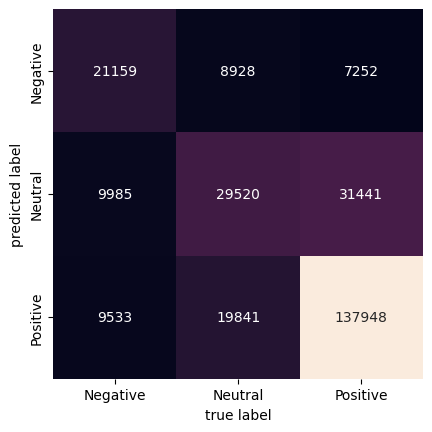

In [11]:
mat_books = confusion_matrix(y_test_books, y_pred_books)

target_names = ['Negative', 'Neutral','Positive']
sns.heatmap(mat_books.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

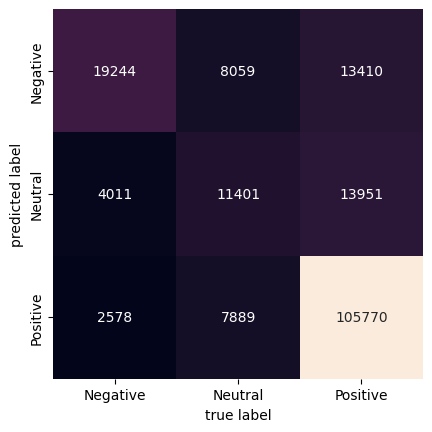

In [12]:
mat_movies = confusion_matrix(y_test_movies, y_pred_movies)

target_names = ['Negative', 'Neutral','Positive']
sns.heatmap(mat_movies.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Negative - Positive

In [13]:
df_books = df_b.dropna(subset=['review_text'])
df_books['sentiment'] = df_books['rating'].apply(lambda x: 0 if x < 4 else 1)
df_books.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,sentiment
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,1
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,0
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,0
3,3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,0
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,1


In [14]:
df_movies = df_m.dropna(subset=['rating', 'review'])
df_movies['rating'] = pd.to_numeric(df_movies['rating'], errors='coerce')
df_movies['sentiment'] = df_movies['rating'].apply(lambda x: 0 if x <= 4 else 1)
df_movies.head()

,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title,sentiment
0,0,Imme-van-Gorp,7.0,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016,1
1,1,sonofocelot-1,5.0,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016,1
2,2,mhodaee,5.0,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016,1
3,3,fil-nik09,5.0,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016,1
4,4,DVR_Brale,7.0,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016,1


In [15]:
X_books = df_books['review_text']
y_books = df_books['sentiment']

X_train_books, X_test_books, y_train_books, y_test_books = train_test_split(X_books, y_books, test_size=0.2)

count_vect_books = CountVectorizer()
X_train_counts_books = count_vect_books.fit_transform(X_train_books)
X_test_counts_books = count_vect_books.transform(X_test_books)

classifier_books = MultinomialNB()
classifier_books.fit(X_train_counts_books, y_train_books)
y_pred_books = classifier_books.predict(X_test_counts_books)
precision_books, recall_books, fscore_books, support_books = precision_recall_fscore_support(y_test_books, y_pred_books)

print("Precision:", precision_books)
print("Recall:", recall_books)
print("F1 Score:", fscore_books)

Precision: [0.65216753 0.83333934]
Recall: [0.71923579 0.785395  ]
F1 Score: [0.68406168 0.80865715]


In [16]:
X_movies = df_movies['review']
y_movies = df_movies['sentiment']

X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2)

count_vect_movies = CountVectorizer()
X_train_counts_movies = count_vect_movies.fit_transform(X_train_movies)
X_test_counts_movies = count_vect_movies.transform(X_test_movies)

classifier_movies = MultinomialNB()
classifier_movies.fit(X_train_counts_movies, y_train_movies)
y_pred_movies = classifier_movies.predict(X_test_counts_movies)
precision_movies, recall_movies, fscore_movies, support_movies = precision_recall_fscore_support(y_test_movies, y_pred_movies)

print("Precision:", precision_movies)
print("Recall:", recall_movies)
print("F1 Score:", fscore_movies)

Precision: [0.49722212 0.95363394]
Recall: [0.80967474 0.8270271 ]
F1 Score: [0.61609788 0.88582958]


Text(113.9222222222222, 0.5, 'predicted label')

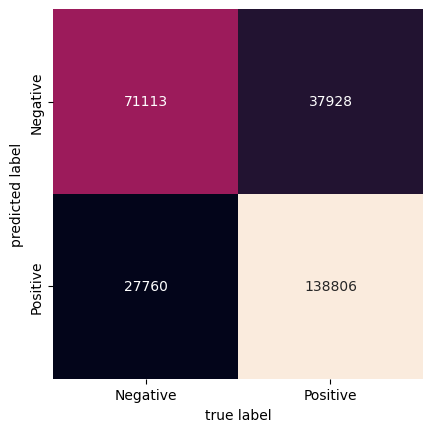

In [17]:
mat_books = confusion_matrix(y_test_books, y_pred_books)

target_names = ['Negative','Positive']
sns.heatmap(mat_books.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

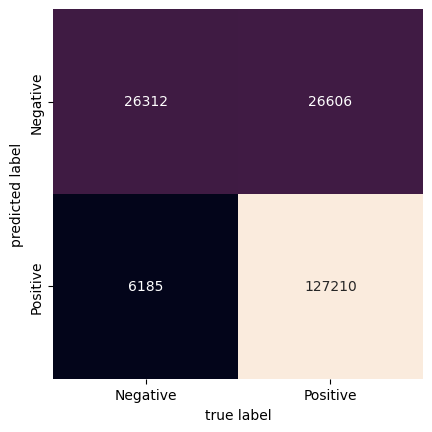

In [18]:
mat_movies = confusion_matrix(y_test_movies, y_pred_movies)

target_names = ['Negative','Positive']
sns.heatmap(mat_movies.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')